  IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

UPLOADING DATASET

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bank.csv to Bank.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Bank.csv',sep=';')

LOADING DATASET

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# Extract the month from dummy columns
# The month column already exists in the dataframe, this step is not needed
# df['month'] = df[[col for col in df.columns if col.startswith('month_')]].idxmax(axis=1)
# df['month'] = df['month'].str.replace('month_', '')  # remove prefix

In [ ]:
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

df['quarter'] = df['month'].str.lower().map(month_to_quarter)

In [ ]:
df.drop(columns=[col for col in df.columns if col.startswith('month_')], inplace=True)
df.drop(columns=['month'], inplace=True)  # optional if you don’t want the month

In [ ]:
df['quarter']

,quarter
0,Q4
1,Q2
2,Q2
3,Q2
4,Q2
...,...
4516,Q3
4517,Q2
4518,Q3
4519,Q1


In [ ]:
# Step 1: Get job columns
# job_columns = [col for col in df.columns if col.startswith('job_')]

# Step 2: Reconstruct original 'job' column
# df['job'] = df[job_columns].idxmax(axis=1).str.replace('job_', '')

# Step 3: Define high and low income jobs
high_income = ['management', 'self-employed', 'entrepreneur']
low_income = ['blue-collar', 'housemaid', 'services', 'technician', 'unemployed']

# Step 4: Categorize into income groups
def categorize_income(job):
    job = job.lower()
    if job in high_income:
        return 'high_income'
    elif job in low_income:
        return 'low_income'
    else:
        return 'other'  # e.g. student, retired, unknown

# Step 5: Apply categorization
df['income_category'] = df['job'].apply(categorize_income)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,quarter,income_category
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,no,Q4,low_income
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,no,Q2,low_income
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,no,Q2,high_income
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,no,Q2,high_income
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,no,Q2,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,329,5,-1,0,unknown,no,Q3,low_income
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,153,1,-1,0,unknown,no,Q2,high_income
4518,57,technician,married,secondary,no,295,no,no,cellular,19,151,11,-1,0,unknown,no,Q3,low_income
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,129,4,211,3,other,no,Q1,low_income


In [ ]:
df.shape

(4521, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              4521 non-null   int64 
 1   job              4521 non-null   object
 2   marital          4521 non-null   object
 3   education        4521 non-null   object
 4   default          4521 non-null   object
 5   balance          4521 non-null   int64 
 6   housing          4521 non-null   object
 7   loan             4521 non-null   object
 8   contact          4521 non-null   object
 9   day              4521 non-null   int64 
 10  duration         4521 non-null   int64 
 11  campaign         4521 non-null   int64 
 12  pdays            4521 non-null   int64 
 13  previous         4521 non-null   int64 
 14  poutcome         4521 non-null   object
 15  y                4521 non-null   object
 16  quarter          4521 non-null   object
 17  income_category  4521 non-null   

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
display(df.isnull().sum())

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

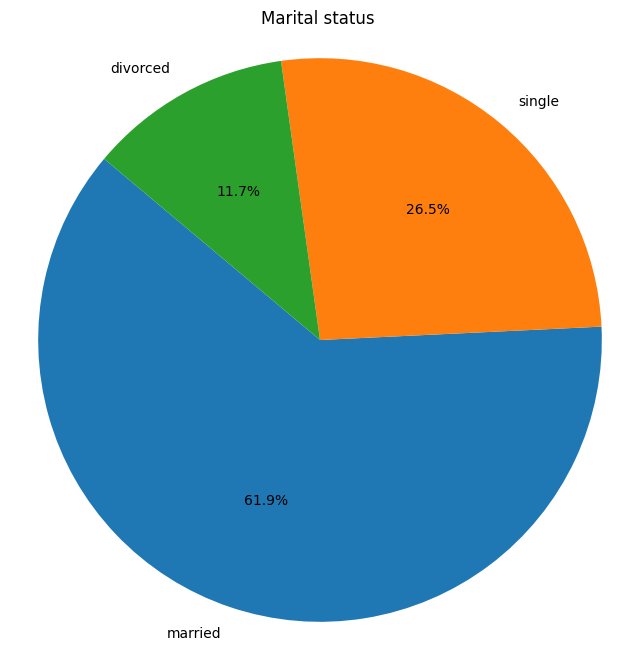

In [ ]:
# Calculate the value counts for the 'marital' column
department_counts = df['marital'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital status ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

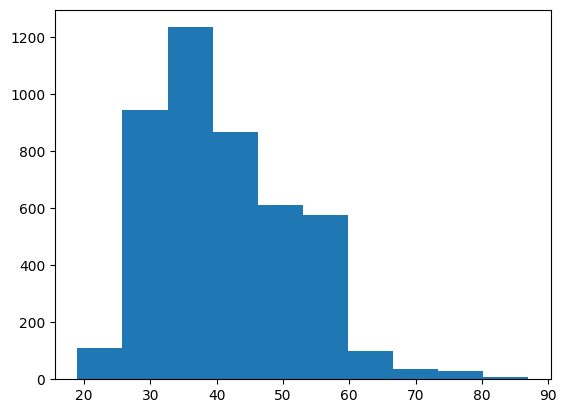

In [ ]:
plt.hist(x=df['age'])

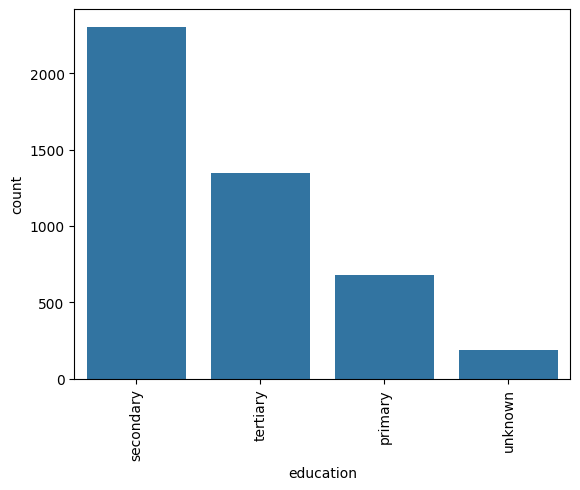

In [ ]:
job_counts = df['education'].value_counts().reset_index()
job_counts.columns = ['education', 'count']
sns.barplot(x='education', y='count', data=job_counts)
plt.xticks(rotation=90)
plt.show()

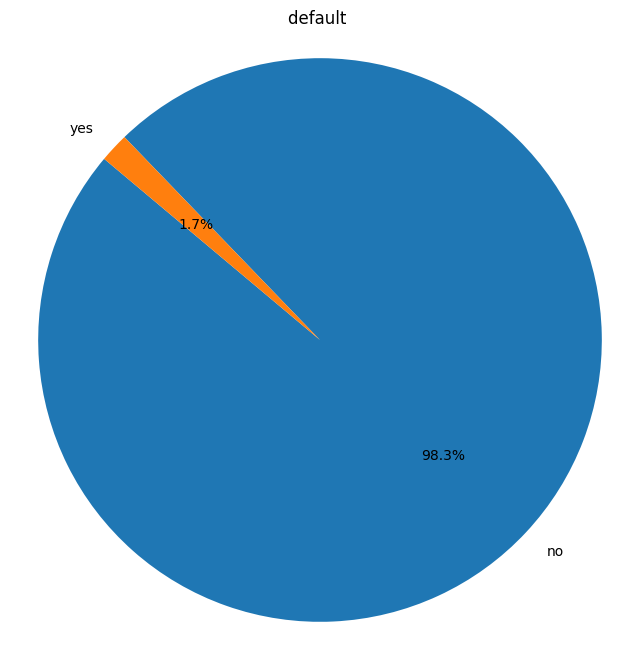

In [ ]:
# Calculate the value counts for the 'default' column
department_counts = df['default'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('default ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

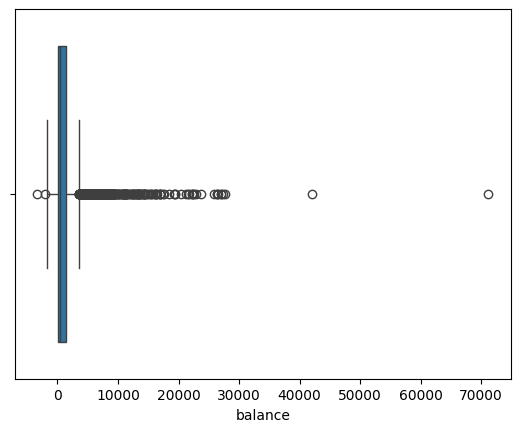

In [ ]:
sns.boxplot(x='balance', data=df)
plt.show()

In [ ]:
q3=df['balance'].quantile(.75)
q1=df['balance'].quantile(.25)
iqr=q3-q1
iqr

np.float64(1411.0)

<Axes: xlabel='balance'>

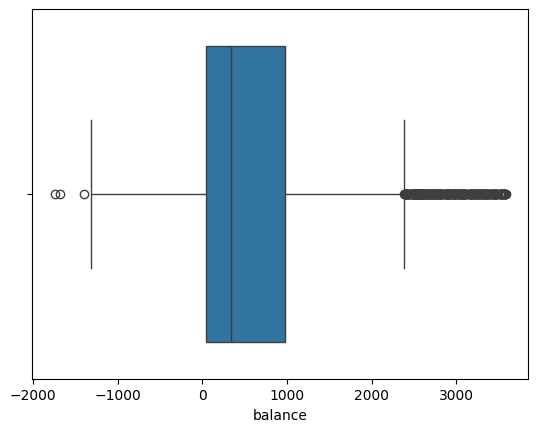

In [ ]:
upperrange= q3+1.5*iqr
bottomrange=q1-1.5*iqr
df_filtered = df[(df['balance']>bottomrange)&(df['balance']<upperrange)]
sns.boxplot(data=df_filtered,x='balance')

<Axes: xlabel='duration'>

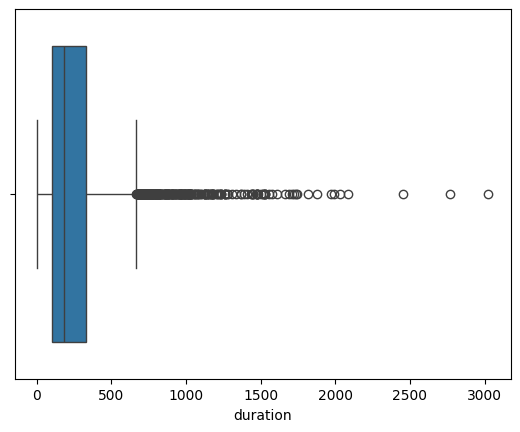

In [ ]:
sns.boxplot(x='duration', data=df)

In [ ]:
q3=df['duration'].quantile(.75)
q1=df['duration'].quantile(.25)
iqr=q3-q1
iqr

np.float64(225.0)

<Axes: xlabel='duration'>

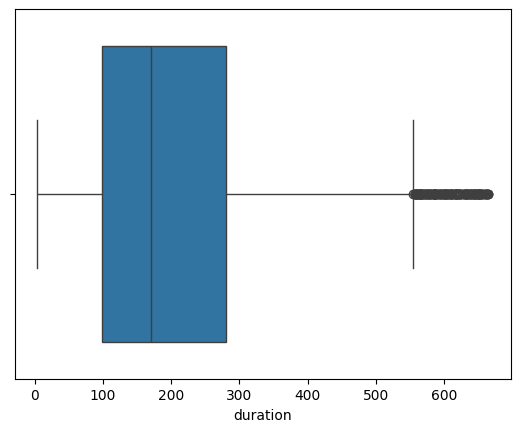

In [ ]:
upperrange= q3+1.5*iqr
bottomrange=q1-1.5*iqr
df_filtered_duration = df[(df['duration']>bottomrange)&(df['duration']<upperrange)]
sns.boxplot(data=df_filtered_duration,x='duration')

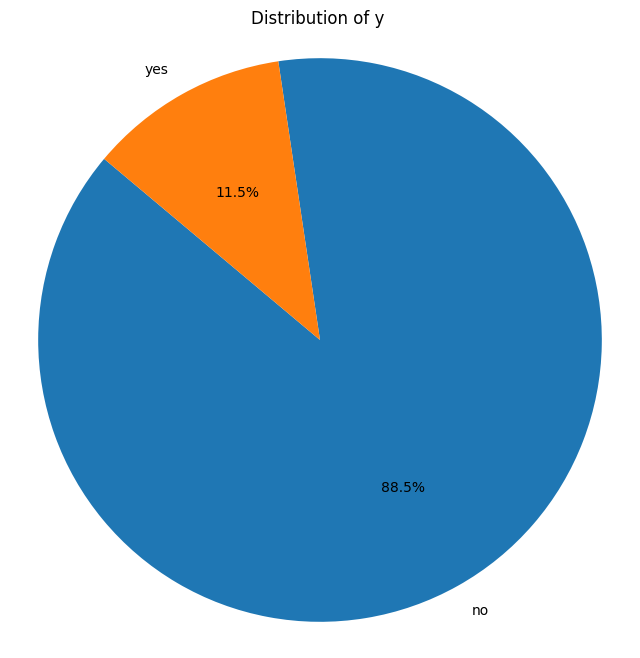

In [ ]:
# Calculate the value counts for the 'y' column
department_counts = df['y'].value_counts()

# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of y ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

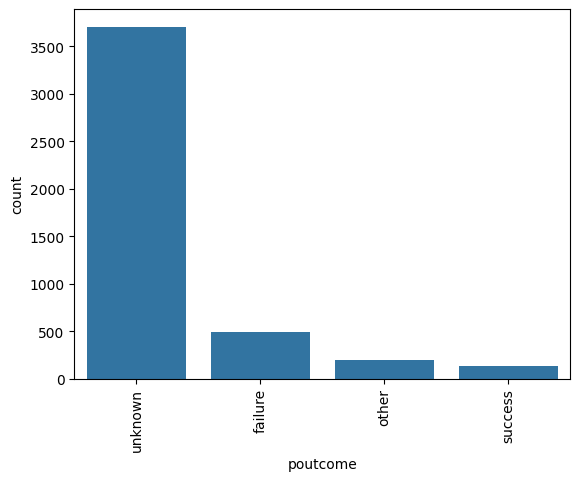

In [ ]:
job_counts = df['poutcome'].value_counts().reset_index()
job_counts.columns = ['poutcome', 'count']
sns.barplot(x='poutcome', y='count', data=job_counts)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,quarter,income_category
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,no,Q4,low_income
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,220,1,339,4,failure,no,Q2,low_income
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,185,1,330,1,failure,no,Q2,high_income
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,199,4,-1,0,unknown,no,Q2,high_income
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,226,1,-1,0,unknown,no,Q2,low_income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,329,5,-1,0,unknown,no,Q3,low_income
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,153,1,-1,0,unknown,no,Q2,high_income
4518,57,technician,married,secondary,no,295,no,no,cellular,19,151,11,-1,0,unknown,no,Q3,low_income
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,129,4,211,3,other,no,Q1,low_income


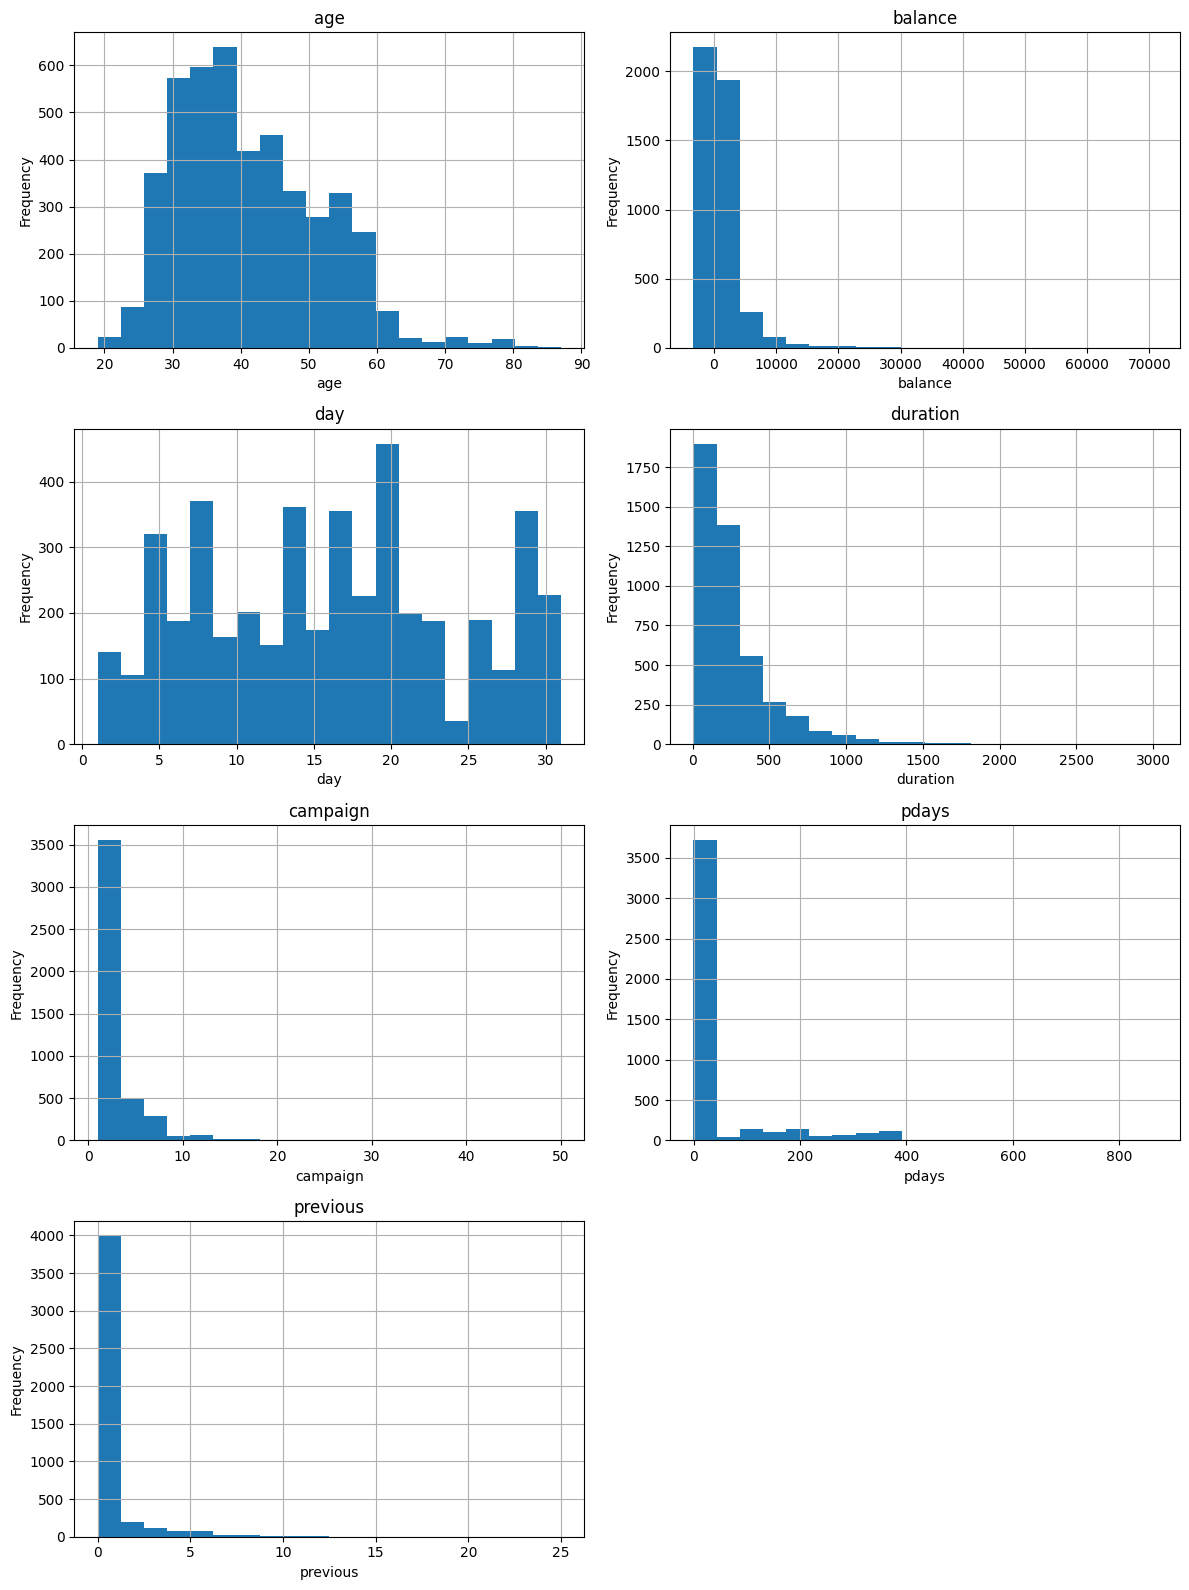

In [ ]:
# Draw histograms for each column in the dataset
# Filter out boolean columns before plotting histograms
numerical_data = df.select_dtypes(include=np.number)

num_columns = numerical_data.shape[1]
num_rows = (num_columns + 1) // 2 #Calculate the number of rows for subplots

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4)) # Adjust figsize based on num_rows

# Flatten axes if multiple rows are used
axes = axes.flatten()

for i, column in enumerate(numerical_data.columns):
   numerical_data[column].hist(ax=axes[i], bins=20)  #Adjust bins as needed
   axes[i].set_title(f"{column}")
   axes[i].set_xlabel(column)
   axes[i].set_ylabel("Frequency")

# If there's an odd number of column, remove the empty subplot
if num_columns % 2 !=0:
    fig.delaxes(axes[-1])

plt.tight_layout()  #Adjust layout for spacing between subplots
plt.show()

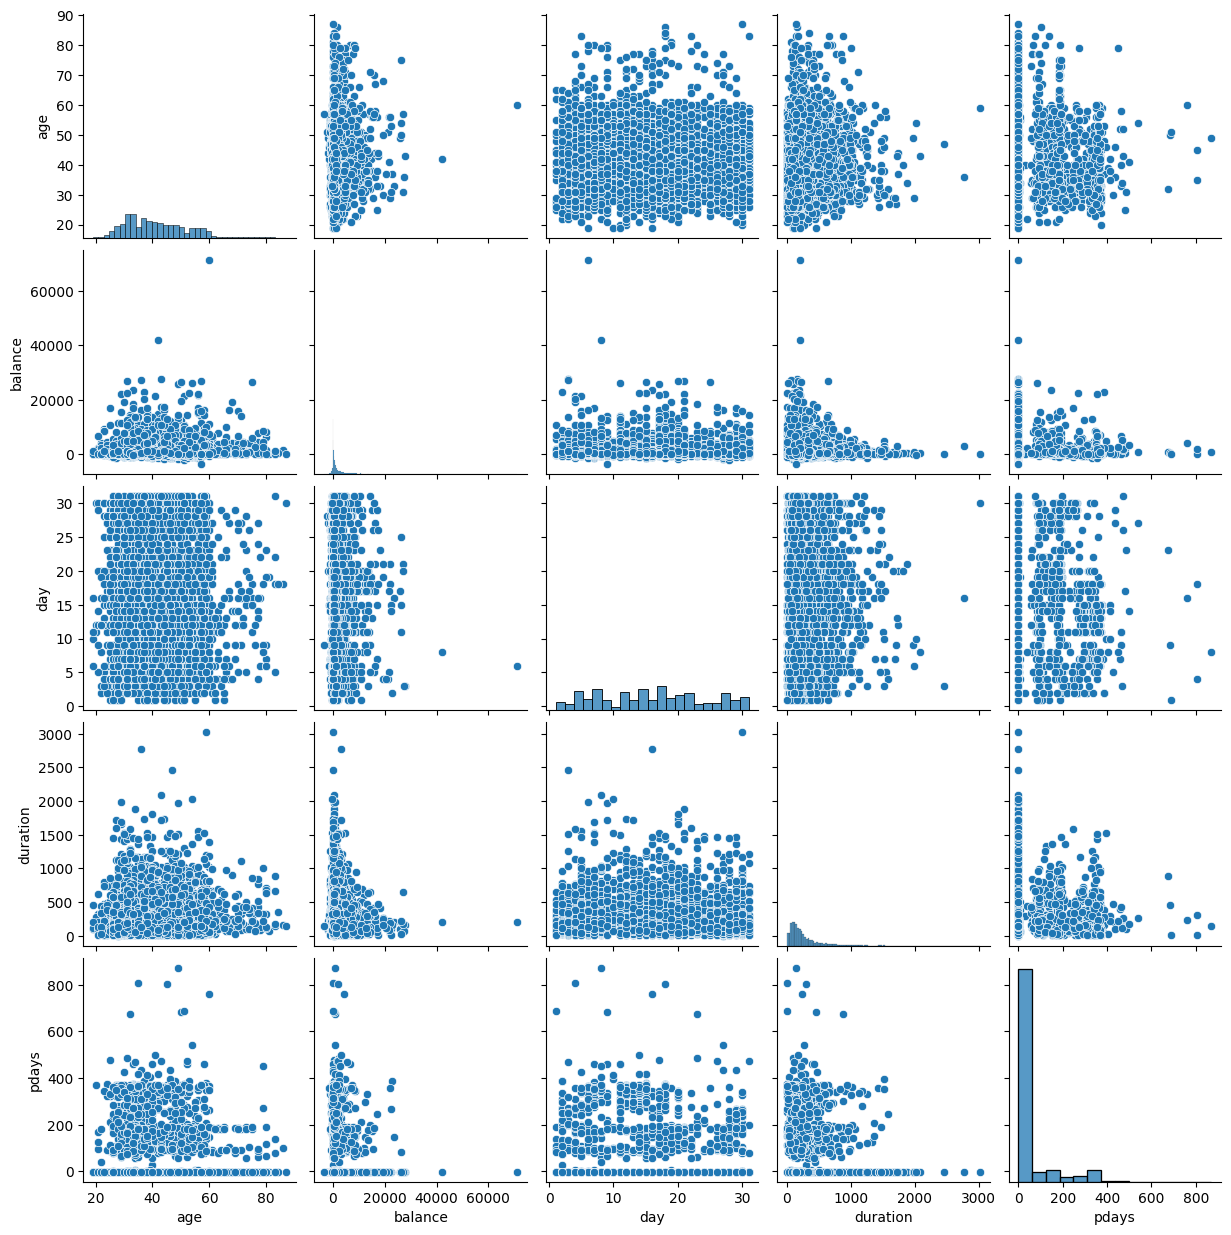

In [ ]:
sns.pairplot(df[['age','job','default','balance','housing','loan','contact','day','duration','pdays','poutcome','y']])
plt.show()

In [ ]:
# Select only numerical columns for correlation matrix
numerical_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
display(correlation_matrix)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


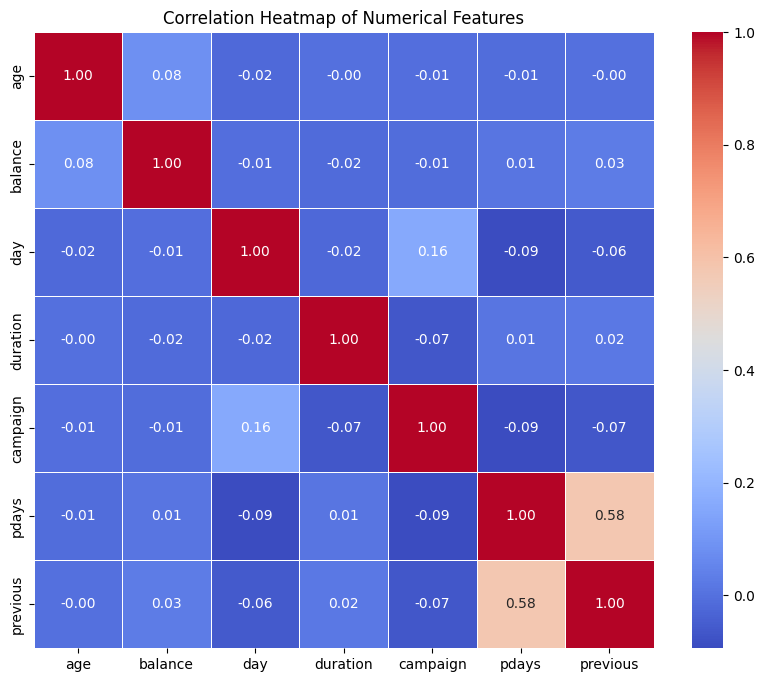

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# Apply get_dummies to all columns with drop_first=True
df = pd.get_dummies(df, drop_first=True)

print(df.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   30     1787   19        79         1     -1         0            False   
1   33     4789   11       220         1    339         4            False   
2   35     1350   16       185         1    330         1            False   
3   30     1476    3       199         4     -1         0            False   
4   59        0    5       226         1     -1         0             True   

   job_entrepreneur  job_housemaid  ...  contact_unknown  poutcome_other  \
0             False          False  ...            False           False   
1             False          False  ...            False           False   
2             False          False  ...            False           False   
3             False          False  ...             True           False   
4             False          False  ...             True           False   

   poutcome_success  poutcome_unknown  y_yes  quarter_Q2  quarter_Q3  \
0 

In [ ]:
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes,quarter_Q2,quarter_Q3,quarter_Q4,income_category_low_income,income_category_other
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,True,False,True,False,False,False,False
4,59,0,5,226,1,-1,0,True,False,False,...,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4517,57,-3313,9,153,1,-1,0,False,False,False,...,True,False,False,True,False,True,False,False,False,False
4518,57,295,19,151,11,-1,0,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4519,28,1137,6,129,4,211,3,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
for i in range(df.shape[1]):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
age
34    231
32    224
31    199
36    188
33    186
     ... 
76      2
81      1
86      1
87      1
84      1
Name: count, Length: 67, dtype: int64
[ 1787  4789  1350 ...  -333 -3313  1137]
balance
0       357
2        24
1        15
4        13
23       11
       ... 
5304      1
6969      1
572       1
164       1
4554      1
Name: count, Length: 2353, dtype: int64
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
day
20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: count

In [ ]:
print(df)

      age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0      30     1787   19        79         1     -1         0            False   
1      33     4789   11       220         1    339         4            False   
2      35     1350   16       185         1    330         1            False   
3      30     1476    3       199         4     -1         0            False   
4      59        0    5       226         1     -1         0             True   
...   ...      ...  ...       ...       ...    ...       ...              ...   
4516   33     -333   30       329         5     -1         0            False   
4517   57    -3313    9       153         1     -1         0            False   
4518   57      295   19       151        11     -1         0            False   
4519   28     1137    6       129         4    211         3             True   
4520   44     1136    3       345         2    249         7            False   

      job_entrepreneur  job

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('y_yes', axis=1)
y = df['y_yes']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,train_size=0.70)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, solver='liblinear')


logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

[False False False ... False False False]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test, predictions)
z

array([[1177,   30],
       [ 103,   47]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9019896831245394

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      1207
        True       0.61      0.31      0.41       150

    accuracy                           0.90      1357
   macro avg       0.76      0.64      0.68      1357
weighted avg       0.89      0.90      0.89      1357



KNN

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=25)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
knn

,Predicted,Actual
2353,False,False
3082,False,False
1450,False,False
525,False,False
1216,False,False
...,...,...
1873,False,False
3984,False,False
1635,False,False
2334,False,False


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8975681650700074

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1195,   12],
       [ 127,   23]])

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

       False       0.90      0.99      0.95      1207
        True       0.66      0.15      0.25       150

    accuracy                           0.90      1357
   macro avg       0.78      0.57      0.60      1357
weighted avg       0.88      0.90      0.87      1357



SVC

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [ ]:
SVC()

SVC()

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
svm

,Predicted,Actual
2353,False,False
3082,False,False
1450,False,False
525,False,False
1216,True,False
...,...,...
1873,False,False
3984,False,False
1635,False,False
2334,False,False


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.89240972733972

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1186,   21],
       [ 125,   25]])

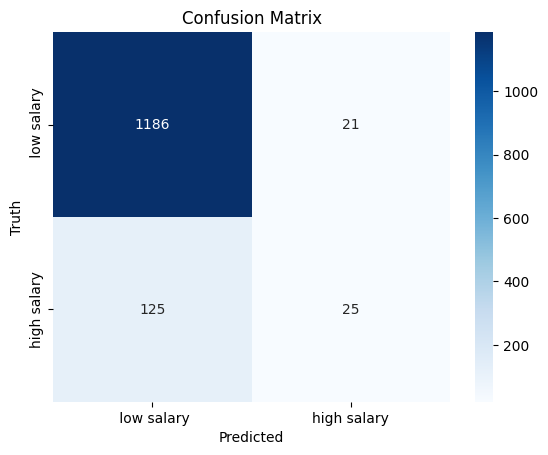

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[" low salary", "high salary"], yticklabels=[" low salary", "high salary"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      1207
        True       0.54      0.17      0.26       150

    accuracy                           0.89      1357
   macro avg       0.72      0.57      0.60      1357
weighted avg       0.86      0.89      0.87      1357



Decision Tree & Random forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      1207
        True       0.40      0.52      0.45       150

    accuracy                           0.86      1357
   macro avg       0.67      0.71      0.69      1357
weighted avg       0.88      0.86      0.87      1357



In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8607221812822402

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      1207
        True       0.56      0.27      0.36       150

    accuracy                           0.90      1357
   macro avg       0.73      0.62      0.65      1357
weighted avg       0.87      0.90      0.88      1357



In [ ]:
import numpy as np # linear algebra
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

print('Model 1 XGBoost Report:')
print(classification_report(y_test, pred1))

print('Model 2 XGBoost Report:')
print(classification_report(y_test, pred2))


Model 1 XGBoost Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      1207
        True       0.54      0.45      0.49       150

    accuracy                           0.90      1357
   macro avg       0.74      0.70      0.72      1357
weighted avg       0.89      0.90      0.89      1357

Model 2 XGBoost Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      1207
        True       0.60      0.39      0.47       150

    accuracy                           0.90      1357
   macro avg       0.76      0.68      0.71      1357
weighted avg       0.89      0.90      0.89      1357



In [ ]:
# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 # objective= 'binary:logistic', # Removed this line as we have multiple classes
 nthread=4,
 # scale_pos_weight=1, # Removed this line as it's for binary classification
 seed=27)

xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy for XGBoost model: %.2f" % (accuracy_score(y_test, pred) * 100))

Accuracy for XGBoost model: 89.09


In [ ]:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

train_model7 = xgb2.fit(X_train, y_train)
pred7 = train_model7.predict(X_test)
print("Accuracy for model 7: %.2f" % (accuracy_score(y_test, pred7) * 100))

Accuracy for model 7: 89.09


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
pred8 = rfc_model.predict(X_test)
print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, pred8) * 100))

Accuracy for Random Forest Model: 89.39
